# **1.Introduction**
We decided to choose the “Google Play Store Apps” project idea and wanted to see whether we could predict app ratings on Google Play Store with using K-nearest neighbors and random forest algorithms. To do that we generated a machine learning algorithm with numpy, pandas, seaborn, matplotlib.pyplot, sklearn, sklearn.neighbors, sklearn.ensemble , sklearn.model_selection libraries which allows us to create this algorithm. First we explored the data and cleaned it and then we handled the missing data. Then we encoded the data based on categories. After that, applied KNN and random forest regression to see the accuracy of our algorithm. 


"*We decided on “Google Play Store Apps” which we specified later to investigate the games that are in the same category and their ratings and number of downloads. Also we would  like to carry a research on how to categorize them by these datasets. We used the datasets from Kaggle and some archives that we have found during the research which we added at the end of progress report. We also aimed to use as much as methods of Machine Learning that we have learnt in the lectures.*"

Above introduction was from our progress report. When we worked more and more on the topic we decided to change it to the beginning  paragraph.

# **2.Description**
We aimed to assess Google Play Store app data in order to give better insight to how an app will perform in our current clustered app market. There are currently 2.8 million apps on the Google Play Store and knowing how an app will perform in order to better advertise or update it is essential. This algorithm aims to predict how an apps ratings will perform based on the data available. Therefore we are trying to answer the question : Are we able to predict the app rating of an app with the given data set in an accurate enough way?
# **3. Used Methods on Machine Learning**

We used these libraries in order to make this algorithm possible:
  * NumPy:  NumPy is a package for scientific computing with Python with a N-Dimensional array object and various mathematical functions such as linear algebraical calculations.
  * Pandas: Pandas is a data structure and data analysis tool used to read and modify our data.
  * Matplotlib.pyplot: Pyplot is a tool intended for interactive plots and cases of programmatic plot generation
  * Seaborn: Seaborn is a Python data visualization library based on matplotlib. It provides an interface for drawing statistical graphics.
  * Sklearn: Sklearn is a tool with various functions that we used to implement k-nearest algorithm, classification, regression and anomaly detection.

We used two different algorithms to achieve our project’s goal such as:
    *	K-nearest Neighbors
    * Random Forest.

  We have used k-nearest neighbor algorithm for predicting the unknown rating value by matching the with the known values of the most similar ones. To make predictions with that algorithm for a new data point. In the training dataset this algorithm find outs the nearest data points which means its nearest neighbors. K is a hyperparameter and represents number of training data points. First we look at the closest neighbors, then we find the mean accuracy of regression with using methods of X_test and Y_test. Then we calculate the KNN model’s mean accuracy. After that step we tried n-estimator’s different numbers. As an example we can give the steps of our code such as

-We loaded the training and test data

-We chose the value

-For each point in our test data we assigned a class to the test point that was based on present classes’ majority in the chosen points

-We ended it.

We used Random Forest Model to solve regression problems with mean prediction(regression). We accessed RandomForestRegressor from the sklearn.ensemble library which also lets us to use one of the most beneficial parameters for our algorithms which is named n_estimator and helps us to get random forest’s tree numbers. In that RandomForestRegressor we try different number of n_estimators.
The reasons why we chose Random Forest Regression over any other Machine Learning Algorithms is :


* It runs efficiently in large databases just like the one we have
* It gives estimations of which variables are more important in the classification and it helps us to detect the ones that we should be using.
* It is one of the most accurate Machine Learning algorithms. For many datasets like ours it produces highly accurate classifier.





In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')

from os.path import join

import re
import sys

import time
import datetime

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
path = "/content/gdrive/My Drive"
filename = "googleplaystore.csv"

df = pd.read_csv(join(path, filename))

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/




* *We are going to use the following code to look for how many na values exists in our dataset*

In [0]:
df.isna().sum()


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64



* *We should remove all the na values we found in the previous code instead of replacing them with mean because it has a huge effect on our Machine Learning Algorithms.*

In [0]:
df = df.dropna()
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64



* *We are going to check the categories with this piece of code and then we'll find out that we do not have any unrelated categories*

In [0]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

* *In this part we have some versions which include non numeric and unicode characters we could replace but current version is not relative with ranking which is obvious we can just drop it from our dataset.*

In [0]:
a = df['Current Ver'].unique()
with np.printoptions(threshold=np.inf):
    print(a)
df = df.drop(columns='Current Ver')

['1.0.0' '2.0.0' '1.2.4' 'Varies with device' '1.1' '1.0' '6.1.61.1'
 '2.9.2' '2.8' '1.0.4' '1.0.15' '3.8' '1.2.3' '3.1' '2.2.5' '5.5.4' '4.0'
 '2.2.6.2' '1.1.3' '1.5' '1.0.8' '1.03' '6.0' '6.7.12.2018' '1.2' '2.20'
 '1.1.0' '1.6' '2.1' '1.0.9' '1.3' '1' '2.0.1' '1.46' '1.6.1' '11.0' '3.0'
 '1.7.1' '2.5.1' '1.0.1' '2.493' '1.9.1' '1.7' '2.20 Build 02' '1.37'
 '0.2.1' '4.47.3' '1.9.7' '2.2.21' '2.9' '1.79' '2.3.5.1' '8.31' '1.1.5.0'
 '10.0.2' '1.10.3' '3.20.1' '1.0.3' '1.4' '4.6.5' '2.8.2' '4.0.3' '1.40'
 '1.5.18' '2.3.4' '2.17' '6.10.1' '2.3.0' '1.0.6' '1.9' '5.4' '3.0.1'
 '3.3.9' '1.20' '2.3.09' '1.4.2' '18.5' '1.2.13' '1.0.2.0' '3.1.89'
 '2.2.0' '1.9.2' '1.3.2' '3.2.1' '2.0.075' '1.911805270' '9.1.363' '1.1.6'
 '2.3.18' '15.0' '18.05.31+530' '5.0.6' '3.12' '2.0' '1.28' '6.0.8'
 '9.00.950462' '14.0' '3.05' '2.5.3' '7.0.4.6' '1.15' '3.1.7.9' '3.9.1'
 '3.4.2' '2.19.0.204537701' '9.7.14188' '4.9.10' '5.2.8' '3.3' '3.550.2'
 '4.6.30' '7.3.21' '1.1.13' '3.0.1.11 (Build 311)' '5.1.5' '2.3.6



* *In the price category we have dollar sign in each row, so we remove it in the following code.*


In [0]:
df['Price'].unique()
df['Price'] = df['Price'].str.replace('$','')


* *To make sure that we have indeed removed it.*



In [0]:
df['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '7.99', '5.99', '2.99', '3.49',
       '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00', '24.99',
       '11.99', '79.99', '16.99', '14.99', '29.99', '12.99', '2.49',
       '10.99', '1.50', '19.99', '15.99', '33.99', '39.99', '3.95',
       '4.49', '1.70', '8.99', '1.49', '3.88', '399.99', '17.99',
       '400.00', '3.02', '1.76', '4.84', '4.77', '1.61', '2.50', '1.59',
       '6.49', '1.29', '299.99', '379.99', '37.99', '18.99', '389.99',
       '8.49', '1.75', '14.00', '2.00', '3.08', '2.59', '19.40', '3.90',
       '4.59', '15.46', '3.04', '13.99', '4.29', '3.28', '4.60', '1.00',
       '2.95', '2.90', '1.97', '2.56', '1.20'], dtype=object)

* *As you can see above datatype of price column is "object" since our algorithm can not understand that as float we need to change it to float.*

In [0]:
df['Price'] = df['Price'].astype(float)
df['Price'].dtype

dtype('float64')

* *Just like the dollar sign we have removed, we are going to remove the '+' sign from the rows and we are also going to replace it with an ' ' empty space.*


In [0]:
df['Installs'].unique()
df['Installs'] = df['Installs'].str.replace('+','')

NameError: ignored

* **

*    *We removed ',' to convert these strings into floats.*

In [0]:
df['Installs'] = df['Installs'].str.replace(',', '')  
df['Installs'].unique()
df['Installs'] = df['Installs'].astype(float)
df['Installs'].dtype

dtype('float64')

*    *Since the app name doesn't mean anything for rating, we decided to drop it all together.*

In [0]:
df = df.drop(columns='App')

*    We checked the size of the column and converted all values to kilobytes.*

In [0]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      



*   *We removed rows which contain 'varies with devices' to not cause errors.*




In [0]:
df['Size'] = df['Size'].str.replace('k','')
df['Size'] = df['Size'].str.replace('M', '000')
df['Size'] = df['Size'].str.replace('.', '')
df = df[~df['Size'].isin(['Varies with device'])] 
df['Size'].unique()

array(['19000', '14000', '87000', '25000', '28000', '56000', '29000',
       '33000', '31000', '12000', '20000', '21000', '37000', '55000',
       '17000', '39000', '42000', '23000', '60000', '61000', '46000',
       '92000', '52000', '11000', '24000', '94000', '15000', '10000',
       '26000', '80000', '79000', '57000', '35000', '54000', '201',
       '36000', '86000', '27000', '70000', '16000', '34000', '89000',
       '38000', '32000', '18000', '22000', '45000', '98000', '90000',
       '67000', '30000', '71000', '64000', '82000', '49000', '95000',
       '50000', '59000', '13000', '73000', '68000', '40000', '91000',
       '23', '65000', '75000', '51000', '41000', '48000', '85000',
       '83000', '43000', '47000', '78000', '88000', '66000', '79',
       '84000', '118', '44000', '695', '62000', '53000', '72000', '58000',
       '96000', '63000', '77000', '93000', '81000', '69000', '74000',
       '97000', '556', '526', '76000', '334', '100000', '99000', '232',
       '624', '85', '



*   *We convert the type to float.*



In [0]:
df['Size'] = df['Size'].astype(float)
df['Size'].dtype

dtype('float64')

In [0]:
df['Rating'].dtype 
df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])


*   *Checking to see whether we can convert it to float or if its ok because there are some non-numeric characters.*


In [0]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [0]:
df['Reviews'] = df['Reviews'].astype(float)
df['Reviews'].dtype

dtype('float64')



*   *We mapped free and paid apps to 0 and 1 according to their types.*



In [0]:
df['Type'] = df['Type'].str.replace('Free', '0') 
df['Type'] = df['Type'].str.replace('Paid', '1')
df['Type'].astype(int)

0        0
1        0
2        0
3        0
4        0
        ..
10833    0
10834    0
10836    0
10837    0
10840    0
Name: Type, Length: 7723, dtype: int64


*   *There are some attributes such as content rating and category that we need to change into a numeric key so that ML can compare them as key values instead of numeric values.*



In [0]:
encode = preprocessing.LabelEncoder()
df['Content Rating'] = encode.fit_transform(df['Content Rating'])
df['Content Rating'].dtype

dtype('int64')


*   *We need to do the same thing on category but save the categories on a list so we can use it again if we need to.*




In [0]:
cat_list = df['Category'].unique().tolist()
df['Category'] = encode.fit_transform(df['Category'])
df['Category'].unique() 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 15, 16, 17, 18,
       14, 11, 20, 27, 26, 24, 28, 30, 29, 23, 25, 22, 32, 31, 21, 19])

In [0]:
df['Genres'] = encode.fit_transform(df['Genres'])
df['Genres'].unique()

array([  9,  11,  10,  12,  13,  18,  20,  32,  33,  34,  35,  36,  39,
        40,  37,  42,  38,  49,  51,  54,  56,  57,  58,  59,  62,  63,
        64,  65,   3,   6,  25,  21,  31,  99,   0,  79,  97, 111,  84,
        28,  92,   2,  14, 106,  87,  94,   1,  27,  93,  46,  81,  47,
        23,  45,  48,  26,  53,  29,  70,   8,  95,  82,  85,  44,   7,
        50,  80,  88, 100,  69,  61,   5,  16,  15,  17,  30,  41,  90,
        55, 108,  22,  67,  96,  91,  77, 104, 105, 103,  76,  78,  72,
        73,  74,  75, 110, 107,  71,  66,  60,  68,  43,  24,   4, 109,
        52,  98,  19,  83,  89, 102,  86, 101])

*   *Since our date values have string and integers together, we should encodenthis code with strptime which fits perfectly for this task.* 
*   *%B for month full name,% d for day , %Y for year and remove ',' for it to fit it to the shape of strptime argument. Now we are ready for the Machine Learning part.*



In [0]:
df['Last Updated'] = df['Last Updated'].str.replace(',', '')
df['Last Updated'] = df['Last Updated'].apply(lambda x : time.mktime(datetime.datetime.strptime(x, '%B %d %Y').timetuple()))
df

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver
0,0,4.1,159.0,19000.0,10000.0,0,0.0,1,9,1.515283e+09,4.0.3 and up
1,0,3.9,967.0,14000.0,500000.0,0,0.0,1,11,1.515974e+09,4.0.3 and up
2,0,4.7,87510.0,87000.0,5000000.0,0,0.0,1,9,1.533082e+09,4.0.3 and up
3,0,4.5,215644.0,25000.0,50000000.0,0,0.0,4,9,1.528416e+09,4.2 and up
4,0,4.3,967.0,28000.0,100000.0,0,0.0,1,10,1.529453e+09,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...
10833,3,4.8,44.0,619.0,1000.0,0,0.0,1,18,1.395533e+09,2.2 and up
10834,11,4.0,7.0,26000.0,500.0,0,0.0,1,36,1.497744e+09,4.1 and up
10836,11,4.5,38.0,53000.0,5000.0,0,0.0,1,36,1.500941e+09,4.1 and up
10837,11,5.0,4.0,36000.0,100.0,0,0.0,1,36,1.530835e+09,4.1 and up



*   *We are trying see the effect of neighbor count on our prediction ,the graph is below.*




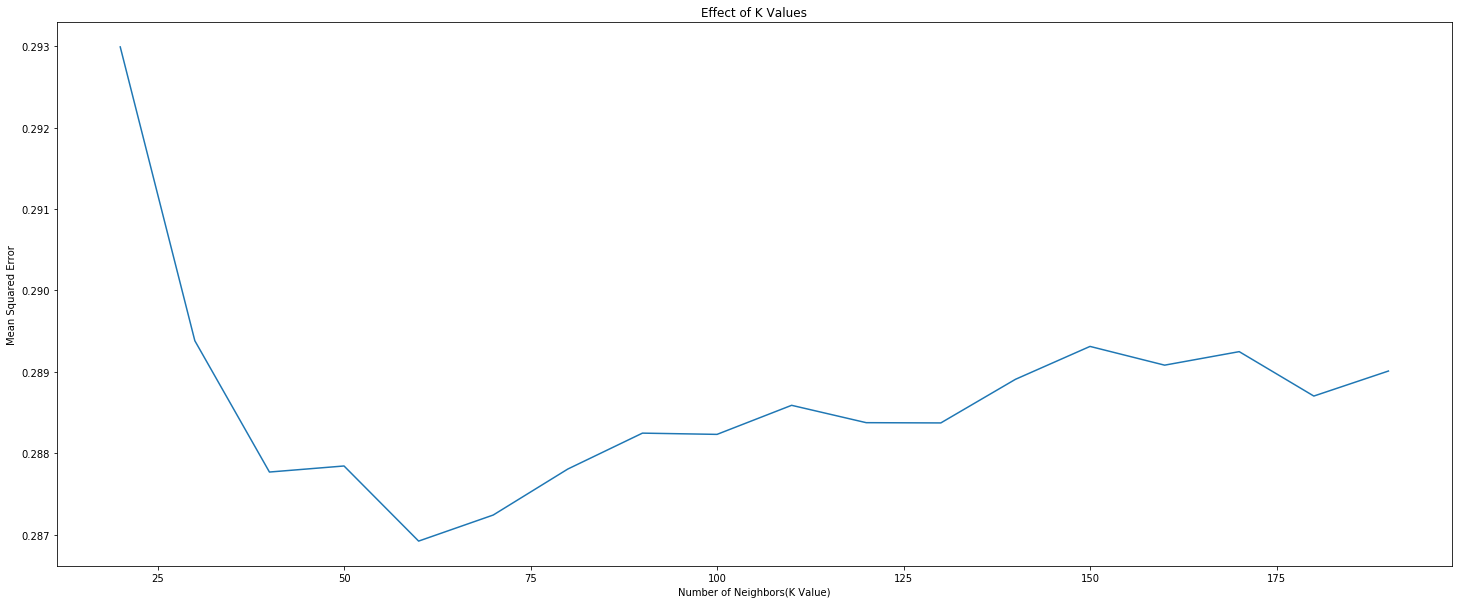

In [0]:
features = ['Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated']   

X = df[features]
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)
knn = KNeighborsRegressor(n_neighbors=800)

knn.fit(X_train, y_train)




neighbours = np.arange(20, 200, 10)                
mse_scores = []
for x in neighbours:
    knn.set_params(n_neighbors=x)
    knn.fit(X_train, y_train)
    mse_scores.append(mean_squared_error(y_test,knn.predict(X_test)))
plt.figure(figsize=(25, 10))
plt.title("Effect of K Values")
plt.xlabel("Number of Neighbors(K Value)")
plt.ylabel("Mean Squared Error")
plt.plot(neighbours, mse_scores)


* *In the following part we are going to use Random Forest Regressor and use the n_estimator hyper-parameter in order to predict and compare the accuracy*


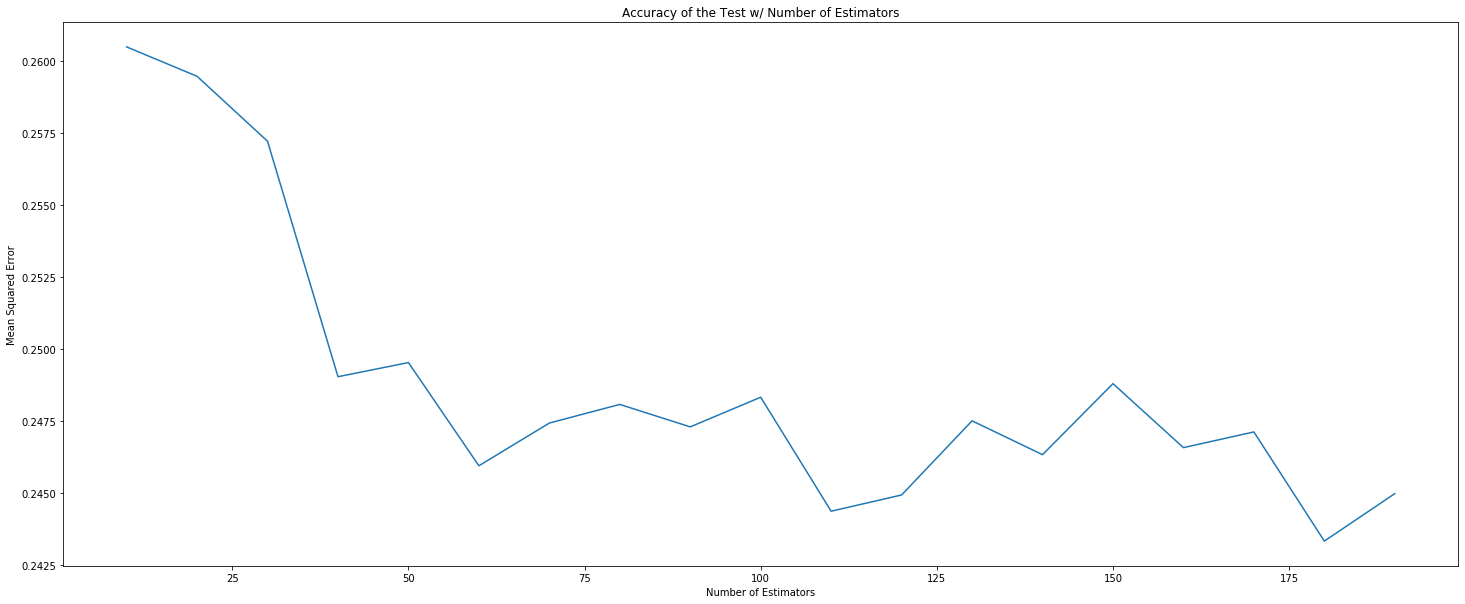

In [0]:
rfr = RandomForestRegressor(n_jobs=-1)
estimators = np.arange(10, 200, 10)
mse_scores = []
for n in estimators:
    rfr.set_params(n_estimators=n)
    rfr.fit(X_train, y_train)
    mse_scores.append(mean_squared_error(y_test,rfr.predict(X_test)))
plt.figure(figsize=(25, 10))
plt.title('Accuracy of the Test w/ Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.plot(estimators, mse_scores)

# **4. Results**
As a result of the project we have concluded with the fact that we can predict the ratings of the app successfully and it is clear that this project works in the correct way. We can say that when we used Random Forest Regressor we got more accurate results if we compare it to the K-Nearest Neighbor algorithm and we have successfully made the prediction based on both of the algorithms. From the results of the used Machine Learning Algorithms we can say that with the Random Forest we can get accurate results and based on our code we can also say that the question that we marked on the description above is answered. It is possible to try to predict the ratings with our given dataset and our project is successful to predict the ratings.

# **5. Discussion**
At the beginning we try to use only K-nearest neighbor algorithms to solve the question we stated however, later on we realized that it was not enough to truly predict the ratings of the app based on only KNN algorithm. Therefore, we decided to use more types of Machine Learning algorithms so that we can later compare and test the results of the algorithms together. At that time we found that Random Forest was the most usable algorithm for our question. Nevertheless, at first we had only tried to check the results from our predictions with the data we had to get accuracy from and due to that it gave us false results. Moreover, we tried the square of the difference between true values and predicted values. And it(result of their difference) got better when it got closer to 0. With the random forest the mean squared error is 0.26 since ratings are scored out of 5. This results means we get the right predictions based on the dataset and our project is counted as successful since we answered and solved our base question.

# **6. Conclusion**
The answer to our question was positive. We were, to a certain extent, able to predict the app ratings with the given data set. 

# **7. Future Directions**
We aim to further research this topic in order to predict app ratings using k-nearest neighbor or other methods of machine learning to predict using data sets with limited amounts of information. After achieving this, we aim to predict app ratings of newly released apps by altering our algorithm to work with wider data sets after we reach our initial goal. We also want to prevent the future unsuccessful app developments before even launching the app to Google Play Store. With doing this we will be preventing the apps which predicted as “unsuccessful” to occupy too much space in the Store. Also we will be giving developers broader insight in order to decide whether it is worthwhile to continue developing the apps or help change the app in order to make it “successful”. 



# **8. Work Division**
Zemheri Kardelen Culfa 23556
*   Data exploration and cleaning
*   Writing, editing and formatting of the final report
 
Oğuz Bor 24940
*   Categorical data encoding
*   Writing, editing and formatting of the final report

Kerem Güneş 24109
*   Evaluation Procedure
*   Research and application on which methods of machine learning to use

Furkan Eken 19540
*   Applying and researching the K-nearest neighbor model
*   Clearing the data based on critical factors

Selçuk Yılmaz 24849
*   Applying and researching random forest model
*   Accuracy testing and final testing of the results











